# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
from scipy import optimize

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import code
import inauguralproject as model
hsm = model.HouseholdSpecializationModelClass()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

To solve the household model, we start by defining the values given to alpha and sigma. Next we create a loop in a loop that maximize the utility of the choices given to the household, for the values of alpha and sigma. 

In the loop we used the solve_discrete model given from the assignment text, and calculated the different values for HF and HM. 

Finally we plottet HF/HM for the different values of alpha and sigma.

In [13]:
# Defining values of alpha and sigma
alpha_vec = np.array([0.25, 0.5, 0.75])
sigma_vec = np.array([0.5, 1., 1.5])

# Creating an empty list for the loop
Female_Male = []

# Looping over different values of alpha and sigma, and caluclating the ratio of HF and HM
for i in alpha_vec:
    for j in sigma_vec:
        hsm.par.alpha = i
        hsm.par.sigma = j

        # Solving for the discrete solution
        Q1sol = hsm.solve_discrete()

        # Printing the ratio of HF and HM
        print(f'HF/HM: {Q1sol.HF/Q1sol.HM} for alpha and sigma: {hsm.par.alpha, hsm.par.sigma}')

        # Appending the ratio of HF and HM to list
        Female_Male.append(Q1sol.HF/Q1sol.HM)

/Users/nina/Source/projects-2023-ctrl-alt-elite/inauguralproject/inauguralproject.py:62: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma) + par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/nina/Source/projects-2023-ctrl-alt-elite/inauguralproject/inauguralproject.py:62: RuntimeWarning: invalid value encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma) + par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/nina/Source/projects-2023-ctrl-alt-elite/inauguralproject/inauguralproject.py:66: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


HF/HM: 0.5454545454545454 for alpha and sigma: (0.25, 0.5)
HF/HM: 0.3076923076923077 for alpha and sigma: (0.25, 1.0)
HF/HM: 0.21428571428571427 for alpha and sigma: (0.25, 1.5)
HF/HM: 1.0 for alpha and sigma: (0.5, 0.5)
HF/HM: 1.0 for alpha and sigma: (0.5, 1.0)
HF/HM: 1.0 for alpha and sigma: (0.5, 1.5)
HF/HM: 1.8333333333333333 for alpha and sigma: (0.75, 0.5)
HF/HM: 3.25 for alpha and sigma: (0.75, 1.0)
HF/HM: 4.666666666666667 for alpha and sigma: (0.75, 1.5)


In [14]:
# Creating an empty list for the loop
label = []

# Looping over the alpha and sigma vectors to create names for the bar plot
for i in alpha_vec:
    for j in sigma_vec:
        label.append('\u03B1=' + str(i)+ ','+ '\u03C3=' + str(j))
    
label

['α=0.25,σ=0.5',
 'α=0.25,σ=1.0',
 'α=0.25,σ=1.5',
 'α=0.5,σ=0.5',
 'α=0.5,σ=1.0',
 'α=0.5,σ=1.5',
 'α=0.75,σ=0.5',
 'α=0.75,σ=1.0',
 'α=0.75,σ=1.5']

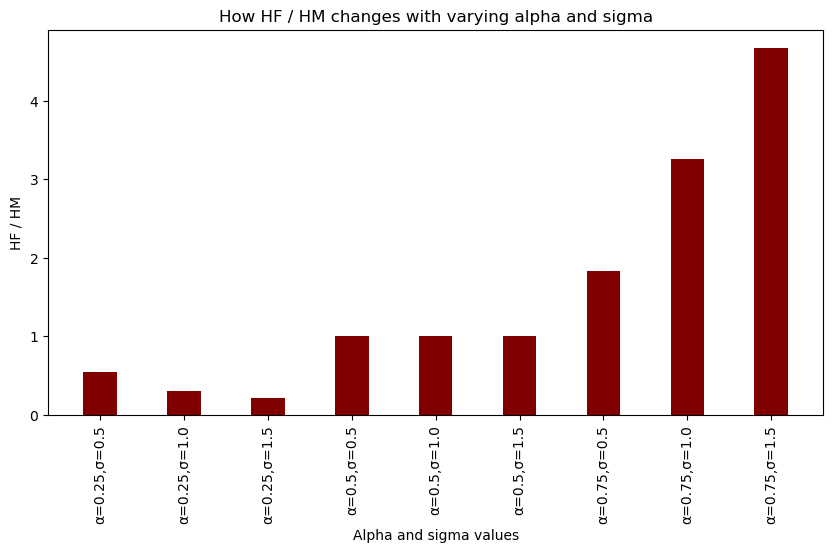

In [15]:
# Starting the figure
barplot = plt.figure(figsize = (10, 5))
 
# Creating the bar plot
plt.bar(label, Female_Male, color ='maroon',
        width = 0.4)

plt.xticks(rotation=90)
plt.xlabel("Alpha and sigma values")
plt.ylabel("HF / HM")
plt.title("How HF / HM changes with varying alpha and sigma")
plt.show()

We find that alpha represends the productivity of females in the households rative to males, and sigma represends the substitution effect. When alpha is equal to 0.5 the houshold labor between the two sexes are equal to eachother as they are equally good at homework. 

However when men are more productive at homeproduction meaning that alpha < 0.5, they will work more in the home than females, and the other way around for alpha > 0.5.

# Question 2

We illustrate the logarithmic functions against eachother. To do this we use the discrete model by using the code given for the assignment as in question 1. 

In [16]:
# Array of values that wF can take
wF_vec = np.array([0.8, 0.9, 1.0, 1.1, 1.2])

# Creating two empty lists for the loop
log_HF_HM = []
log_wF_wM = []

# Defining the standard values of alpha and sigma
hsm.par.alpha = 0.5
hsm.par.sigma = 1

# Looping over the array of values that wF can take
for i in wF_vec:
    hsm.par.wF = i

    # Solving for each value of wF
    Q2sol = hsm.solve_discrete()

    # Appending the solution to the lists
    log_HF_HM.append(math.log(Q2sol.HF/Q2sol.HM))

    log_wF_wM.append(math.log(hsm.par.wF/hsm.par.wM))


print(log_HF_HM)
print(log_wF_wM)


/Users/nina/Source/projects-2023-ctrl-alt-elite/inauguralproject/inauguralproject.py:66: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


[0.22314355131420976, 0.0, 0.0, -0.11778303565638351, -0.2231435513142097]
[-0.2231435513142097, -0.10536051565782628, 0.0, 0.09531017980432493, 0.1823215567939546]


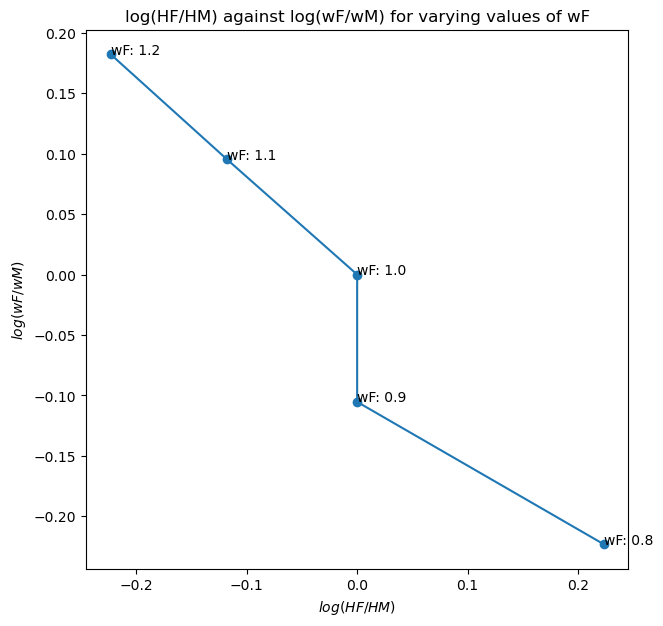

In [20]:
#Illustrating the model
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)
ax.plot(log_HF_HM,log_wF_wM)
ax.scatter(log_HF_HM,log_wF_wM)
ax.set_title('log(HF/HM) against log(wF/wM) for varying values of wF')
ax.set_xlabel('$log(HF/HM)$')
ax.set_ylabel('$log(wF/wM)$')


annotations=["wF: 0.8","wF: 0.9","wF: 1.0","wF: 1.1","wF: 1.2"]
for i, label in enumerate(annotations):
    plt.annotate(label, (log_HF_HM[i], log_wF_wM[i]))

This shows us that when the female wage is relatively higher than the male wage, the females work less in the home. And the other way round when the male wage is relatively higher. 

# Question 3

Explain your code and procedure

We now assume that the choice set is continuous

In [18]:
#Create empty list to store results
optimal_val=[]
log_HF_HM2 = []
log_wF_wM2 = []

#Create loop to solve for varying wF
for wF in hsm.par.wF_vec:
    hsm.par.wF=wF
    hsm.solve_cont()
    optimal_val.append((wF, hsm.sol.LM, hsm.sol.LF, hsm.sol.HM, hsm.sol.HF))
    log_HF_HM2.append(math.log(hsm.sol.HF/hsm.sol.HM))
    log_wF_wM2.append(math.log(hsm.par.wF/hsm.par.wM))

    print(f"wF={wF:.1f}  :  LM={hsm.sol.LM:.2f}, LF={hsm.sol.LF:.2f}, HM={hsm.sol.HM:.2f}, HF={hsm.sol.HF:.2f}, log(HF/HM)={math.log(hsm.sol.HF/hsm.sol.HM):.2f}, log(wF/wM)={math.log(hsm.par.wF/hsm.par.wM):.2f}")

    


wF=0.8  :  LM=5.89, LF=4.09, HM=2.87, HF=5.12, log(HF/HM)=0.58, log(wF/wM)=-0.22
wF=0.9  :  LM=5.17, LF=4.27, HM=3.75, HF=4.75, log(HF/HM)=0.24, log(wF/wM)=-0.11
wF=1.0  :  LM=4.45, LF=4.45, HM=4.45, HF=4.45, log(HF/HM)=0.00, log(wF/wM)=0.00
wF=1.1  :  LM=3.76, LF=4.64, HM=5.02, HF=4.22, log(HF/HM)=-0.17, log(wF/wM)=0.10
wF=1.2  :  LM=3.09, LF=4.83, HM=5.48, HF=4.03, log(HF/HM)=-0.31, log(wF/wM)=0.18


/Users/nina/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minimize.py:569: RuntimeWarning: Method Nelder-Mead cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,


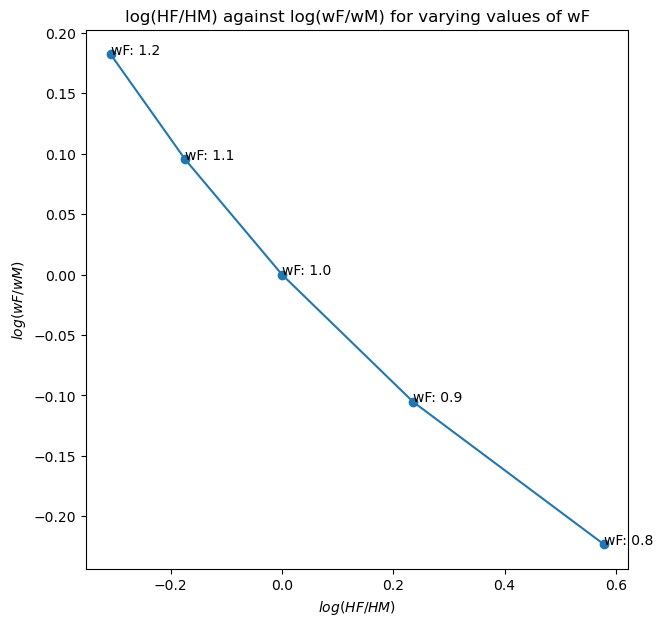

In [21]:
#Plot
#Illustrating the model
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)
ax.plot(log_HF_HM2,log_wF_wM2)
ax.scatter(log_HF_HM2,log_wF_wM2)
ax.set_title('log(HF/HM) against log(wF/wM) for varying values of wF')
ax.set_xlabel('$log(HF/HM)$')
ax.set_ylabel('$log(wF/wM)$')


annotations=["wF: 0.8","wF: 0.9","wF: 1.0","wF: 1.1","wF: 1.2"]
for i, label in enumerate(annotations):
    plt.annotate(label, (log_HF_HM2[i], log_wF_wM2[i]))


ADD CONCISE CONLUSION.

# Question 4

In [ ]:
# code